In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point,LineString
import geoplot as gplt

## Prepare the Boundary and Road Background

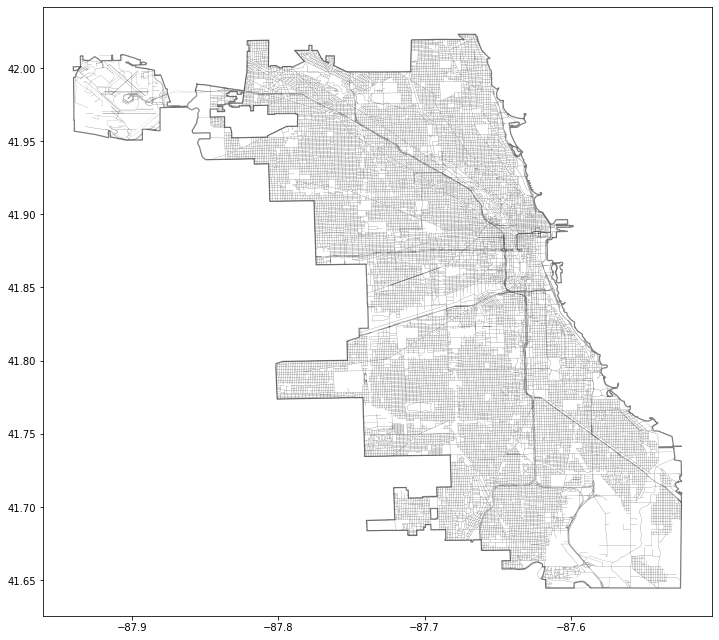

In [4]:
# Create and plot the boundary and road network of Chicago #

road_ori = gpd.read_file('geo_export_aea9043d-42d5-45b7-a783-8892b91c499b.shp')
bound = gpd.read_file('geo_export_39e46b3a-b112-4596-befe-69ddbae4a0bb.shp')

base = bound.plot(figsize = (12,12), color='white',edgecolor='black', lw=1.25, alpha = 0.5)
base_plot = road_ori.plot(ax = base, column='length', cmap='gray', alpha = 0.79, linewidth=0.2)
plt.show()

# Get the xlim and ylim values for later plot frame
#xlimi = ax.get_xlim()
#ylimi = ax.get_ylim()

## Read and Plot the local research points

In [5]:
ls_json = pd.read_json('local_search_solution_coordinates.json')

In [6]:
geome = [Point(xy) for xy in zip(ls_json[1], ls_json[0])]

In [7]:
WGS84 = {'init': 'epsg:4326'}
NZTM = {'no_defs': True, 'init':'epsg:2193'}
Mercator ={'init': 'epsg:3395'}

crs_chi = WGS84

In [8]:
crs_chi = {'init': 'epsg:27700'}
lss_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=geome)

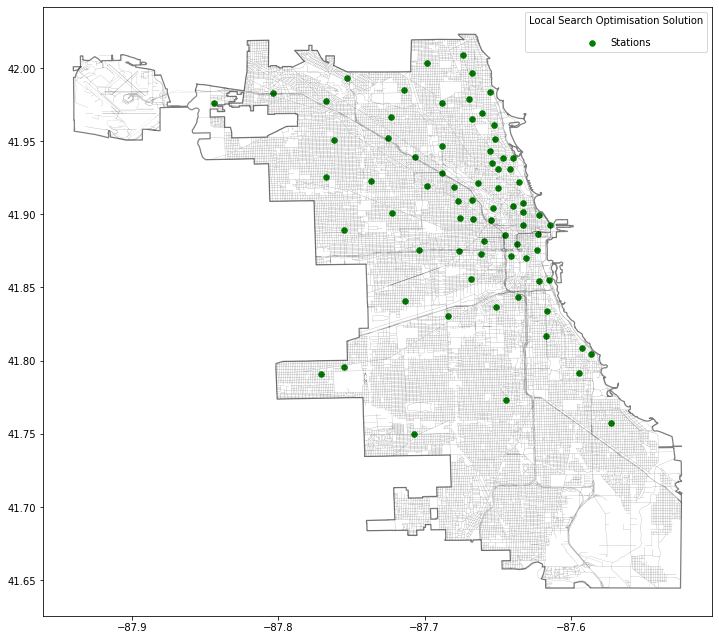

In [9]:
base = bound.plot(figsize = (12,12), color='white',edgecolor='black', lw=1.25, alpha = 0.5)
base_plot = road_ori.plot(ax = base, column='length', cmap='gray', alpha = 0.55, linewidth=0.2)
lss_plot = lss_gdf.plot(ax = base_plot, figsize = (12,12), color='green', markersize=30, label='Stations')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Local Search Optimisation Solution')

plt.savefig('Local Search Solution.png', dpi=300)

plt.show()

AttributeError: 'str' object has no attribute '_geom'

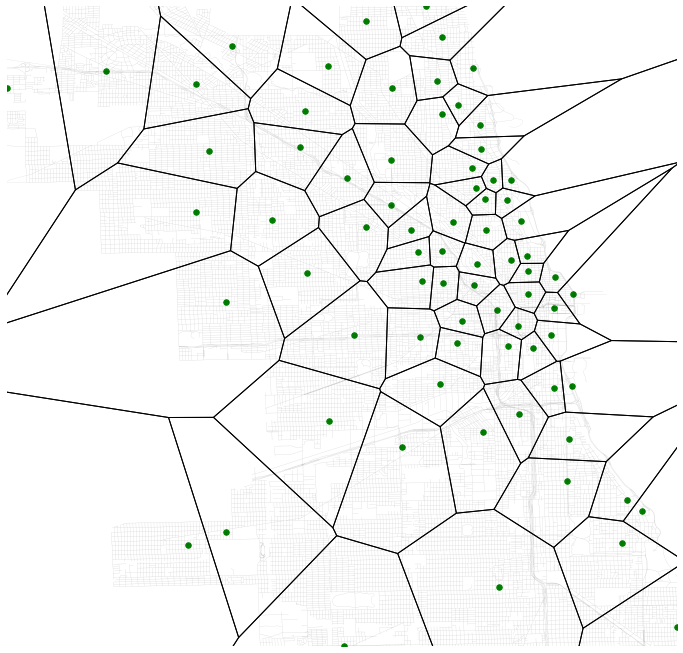

In [29]:
base_plot = road_ori.plot(figsize = (12,12), column='length', cmap='gray', alpha = 0.25, linewidth=0.2)

lss_plot = lss_gdf.plot(ax = base_plot, color='green', markersize=30, label='Stations')

ax1 = gplt.voronoi(
    lss_gdf,
    clip=bound,
    ax=lss_plot)

vori = gplt.polyplot(bound, ax=ax1, alpha=0.15)

base = bound.plot(ax=vori, color='white',edgecolor='black', lw=1.25, alpha = 0.25)

plt.plot([],[], c = 'gray', lw=1, label = 'cluster borders', alpha = 0.7)

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Local Search Optimisation Solution')

plt.savefig('Local Search Solution with Voronoi.png', dpi=300)

plt.show()

## Read and Plot the local research points

In [37]:
opt = pd.read_json('integer_optimal_solution_coordinates.json')

In [47]:
opt['charging_points'].min()

1

In [38]:
ge_opt = [Point(xy) for xy in zip(opt['longitude'], opt['latitude'])]
crs_chi = {'init': 'epsg:27700'}
opt_gdf = gpd.GeoDataFrame(opt['charging_points'], crs=crs_chi, geometry=ge_opt)

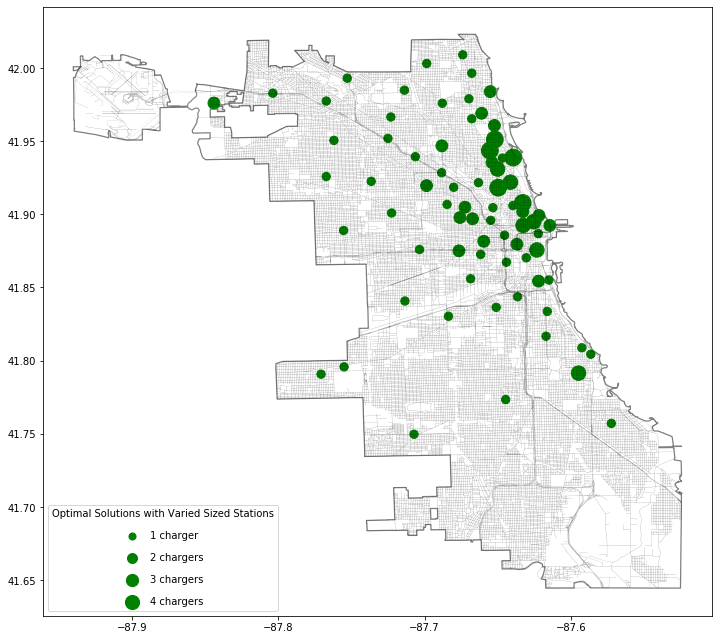

In [56]:
base = bound.plot(figsize=(12,12), color='white',edgecolor='black', lw=1.25, alpha = 0.5)
base_plot = road_ori.plot(ax=base, column='length', cmap='gray', alpha = 0.55, linewidth=0.2)
opt_vari_plot = opt_gdf.plot(ax=base_plot, color='green', markersize=opt_gdf['charging_points']*70)

plt.scatter([],[], c= 'green', s=1*50, label = '1 charger')
plt.scatter([],[], c= 'green', s=2*50, label = '2 chargers')
plt.scatter([],[], c= 'green', s=3*50, label = '3 chargers')
plt.scatter([],[], c= 'green', s=4*50, label = '4 chargers')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Optimal Solutions with Varied Sized Stations')

plt.savefig('Optimal Solutions with Varied Sized Stations.png', dpi=300)

plt.show()

## Read and Plot A rout and the heatmap (To be revised)

In [12]:
rt = pd.read_json('vehicle_route.json')
cp = pd.read_json('vehicle_critical_points.json')

In [13]:
ge = [Point(xy) for xy in zip(cp[1], cp[0])]
crs = {'init': 'epsg:27700'}
critical_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=ge)

In [14]:
rt_points = [Point(xy) for xy in zip(rt['Longitude'], rt['Latitude'])]
rt_line = LineString(rt_points)

crs_chi = {'init': 'epsg:27700'}
rt_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=[rt_line])

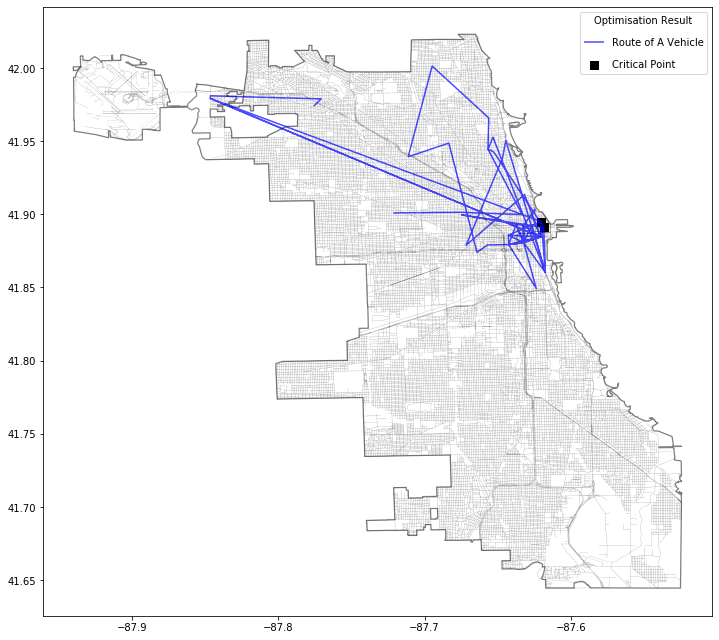

In [15]:
base = bound.plot(figsize = (12,12), color='white',edgecolor='black', lw=1.25, alpha = 0.5)
base_plot = road_ori.plot(ax = base, column='length', cmap='gray', alpha = 0.55, linewidth=0.2)
route_plot = rt_gdf.plot(ax = base_plot, figsize = (12,12), color='blue', markersize=50, alpha=0.7,label='Route of A Vehicle')
critical_plot = critical_gdf.plot(ax = route_plot, figsize = (12,12), marker='s', color='black', markersize=50,label='Critical Point')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Optimisation Result')

plt.savefig('A Vehicle Route and Critical Points.png', dpi=300)

plt.show()

## Read and Plot the Optimal Solution Coordinates

In [33]:
opt = pd.read_json('integer_optimal_solution_coordinates.json')

In [35]:
ge_opt = [Point(xy) for xy in zip(opt['longitude'], opt['latitude'])]
crs_chi = {'init': 'epsg:27700'}
opt_gdf = gpd.GeoDataFrame(opt['charging_points'], crs=crs_chi, geometry=ge_opt)

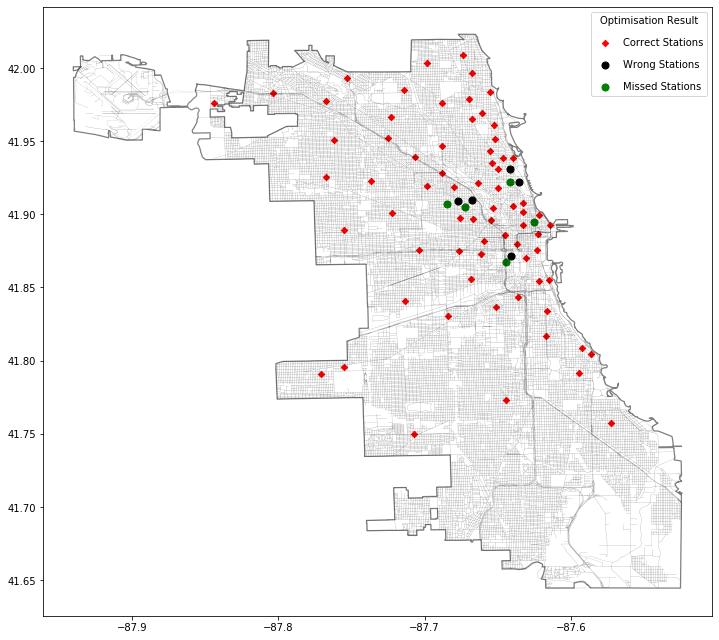

In [36]:
correctlist = []
wronglist = []
misslist = []

for i in lss_gdf.geometry:
    c = 0
    for j in opt_gdf.geometry:
        if i == j:
            correctlist.append(i)
            c = 1
    if c == 0:
        wronglist.append(i)

for m in opt_gdf.geometry:
    a = 0
    for n in lss_gdf.geometry:
        if m == n:
            a = 1
    if a == 0:
        misslist.append(m) 

#print('correctlist', correctlist)        
#print('wronglist', wronglist)
#print('misslist',misslist)

ge_correct = correctlist
ge_wrong = wronglist
ge_miss = misslist
crs_chi = {'init': 'epsg:27700'}

correct_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=ge_correct)
wrong_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=ge_wrong)
miss_gdf = gpd.GeoDataFrame(crs=crs_chi, geometry=ge_miss)


base = bound.plot(figsize = (12,12), color='white',edgecolor='black', lw=1.25, alpha = 0.5)
base_plot = road_ori.plot(ax = base, column='length', cmap='gray', alpha = 0.55, linewidth=0.2)

correct_plot = correct_gdf.plot(ax = base_plot, color='red', marker='D', markersize=20, label='Correct Stations')
wrong_plot = wrong_gdf.plot(ax =correct_plot, color='black', marker='o', markersize=50, label='Wrong Stations')
miss_plot = miss_gdf.plot(ax=wrong_plot, color='green', marker='o', markersize=50, label='Missed Stations')

plt.legend(scatterpoints=1, frameon=True, labelspacing=1.2, title='Optimisation Result')

plt.savefig('Comparison between Local Search Solution and the Optimal Solution.png', dpi=300)

plt.show()